### in this notebook we'll test the .tflite efficiendet models 

models taken from: https://tfhub.dev/s?dataset=coco-2017&deployment-format=lite&subtype=module,placeholder&tf-version=tf2

In [1]:
import tensorflow_hub as hub
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
def get_pred_tflite(interpreter, img_path, img_size=(320,320)):
    image = Image.open(img_path)
    imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
    imagetensor_resized = tf.image.resize(
        imagetensor,
        img_size,
        method=tf.image.ResizeMethod.BILINEAR,
        preserve_aspect_ratio=False,
        antialias=False,
        name=None
    )
    imagetensor_expanddim = tf.expand_dims(imagetensor_resized, axis=0, name=None)
    imagetensor = tf.cast(imagetensor_expanddim, tf.uint8)
    
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], imagetensor)
    interpreter.invoke()

    
    boxes = interpreter.get_tensor(output_details[0]['index'])
    scores = interpreter.get_tensor(output_details[2]['index'])
    classes = interpreter.get_tensor(output_details[1]['index'])
    num_detections = interpreter.get_tensor(output_details[3]['index'])
    
    return boxes, classes, scores, num_detections

In [46]:
def viz_tflite(interpreter, img_path, proba_threshold=0.5, img_size=(320,320)):
    boxes, classes, scores, num_detections = get_pred_tflite(interpreter, img_path, img_size)
    image = cv2.imread(img_path)
    imwidth, imheight = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            labelindex = int(classes[0][i])
            if labelindex == 0:
                label = 'person'
            elif labelindex in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
                label = 'animal'
            else:
                label = 'unknown'
            xmin = int(boxes[0][i][0] * imheight)
            ymin = int(boxes[0][i][1] * imwidth)
            width = int(boxes[0][i][2] * imwidth)
            height = int(boxes[0][i][3] * imheight)
            cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

### efficientdet lite0 

In [8]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

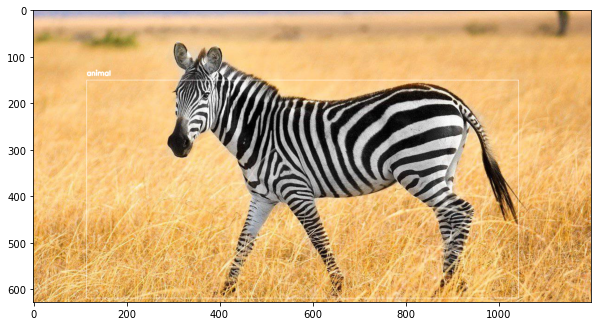

In [29]:
viz_tflite(interpreter, 'zebra_horflip.jpg', 0.5)

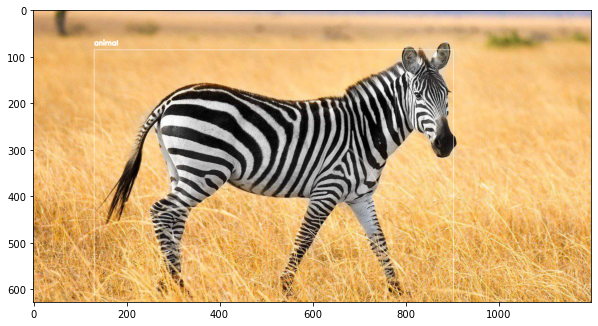

In [30]:
viz_tflite(interpreter, 'zebra.jpg', 0.5)

486 50 420 267
431 0 421 90


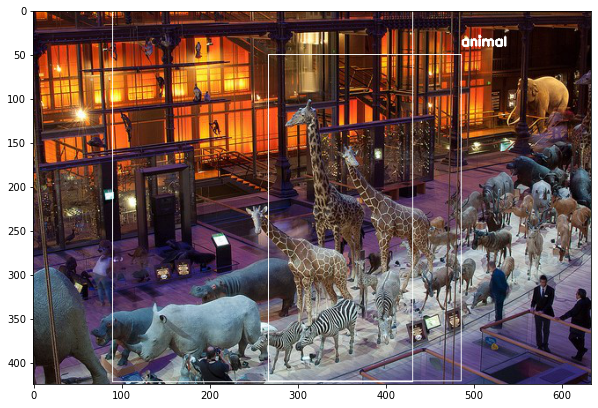

In [55]:
viz_tflite(interpreter, 'person_animals.jpg', 0.5)

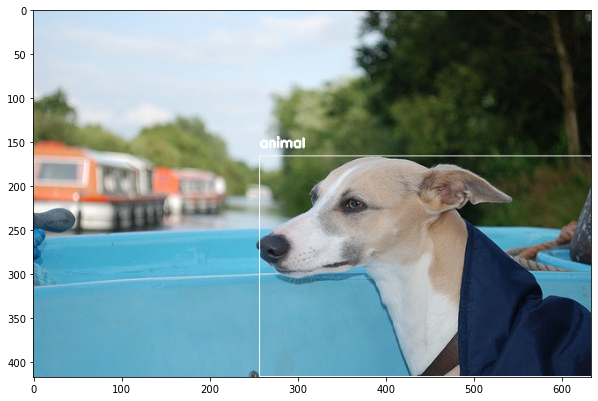

In [42]:
viz_tflite(interpreter, 'with_unknown_class.jpg', 0.5)

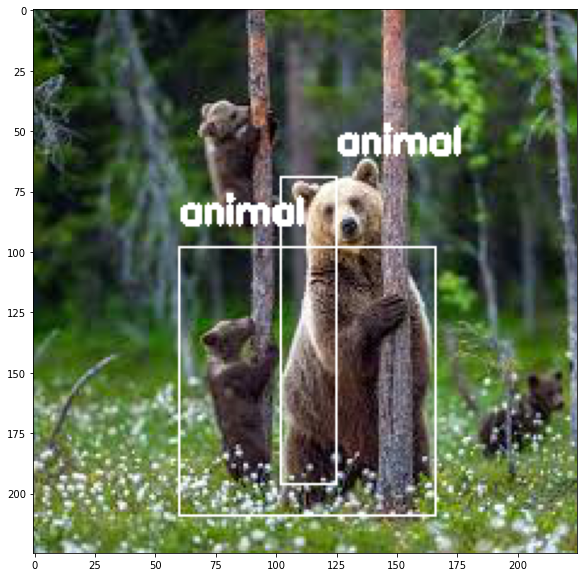

In [33]:
viz_tflite(interpreter, 'animal1.jpg', 0.5)

27 -5 314 323


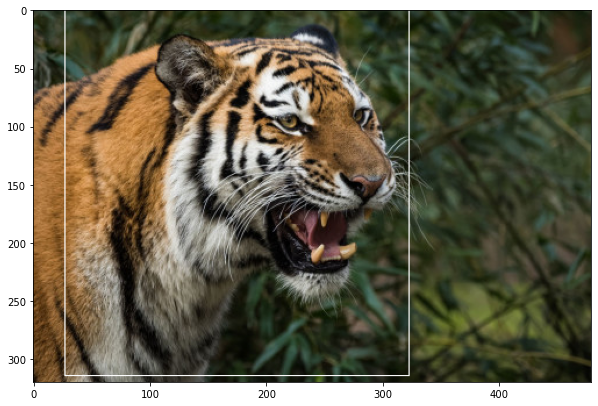

In [48]:
viz_tflite(interpreter, 'animal2.jpg', 0.5)

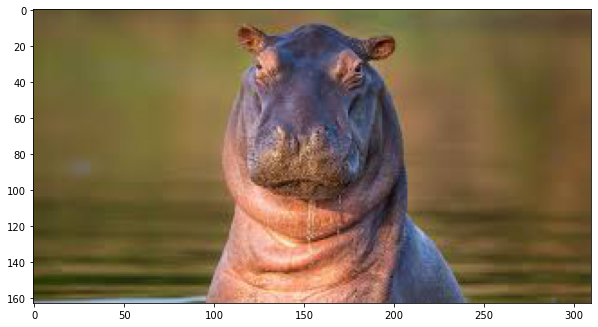

In [49]:
viz_tflite(interpreter, 'animal3.jpg', 0.5)

13 40 164 253


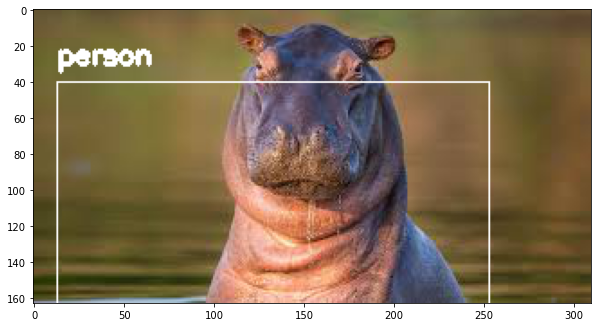

In [56]:
viz_tflite(interpreter, 'animal3.jpg', 0.4)

### efficientdet lite3x

In [63]:
model_path='lite-model_efficientdet_lite3x_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

122 149 620 1059


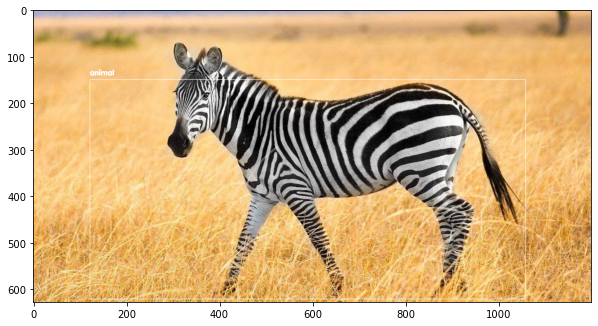

In [64]:
viz_tflite(interpreter, 'zebra_horflip.jpg', 0.5, (640,640))

488 200 402 377
329 160 357 365
470 398 398 632
236 228 308 455
525 166 409 315
450 377 387 594
570 121 423 231


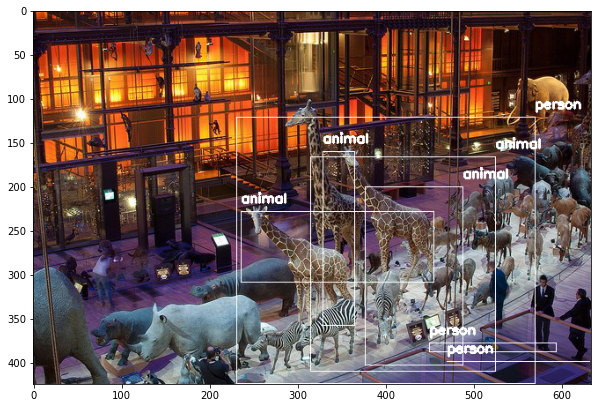

In [65]:
viz_tflite(interpreter, 'person_animals.jpg', 0.5, (640,640))

In [14]:
boxes, classes, scores, num_detections = get_pred_tflite(interpreter, 'person_animals.jpg')

In [15]:
scores

array([[0.62890625, 0.5859375 , 0.5       , 0.5       , 0.4765625 ,
        0.45703125, 0.45703125, 0.43359375, 0.4140625 , 0.39453125,
        0.37109375, 0.33203125, 0.33203125, 0.27734375, 0.27734375,
        0.2109375 , 0.2109375 , 0.2109375 , 0.2109375 , 0.19921875,
        0.19921875, 0.19921875, 0.19921875, 0.18359375, 0.18359375]],
      dtype=float32)

In [19]:
boxes[0][0]

array([0.7666455 , 0.11967558, 0.9920555 , 0.4216234 ], dtype=float32)

### appendix 

In [71]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

In [83]:
img_path = 'animal2.jpg'
image = Image.open(img_path)
imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
imagetensor_resized = tf.image.resize(
    imagetensor,
    img_size,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)
imagetensor_expanddim = tf.expand_dims(imagetensor_resized, axis=0, name=None)
imagetensor = tf.cast(imagetensor_expanddim, tf.uint8)

image = cv2.imread(img_path)

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], imagetensor)
interpreter.invoke()


boxes = interpreter.get_tensor(output_details[0]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
classes = interpreter.get_tensor(output_details[1]['index'])
num_detections = interpreter.get_tensor(output_details[3]['index'])

# return boxes, classes, scores, num_detections

In [84]:
img_path = 'animal2.jpg'
image = cv2.imread(img_path)
imresized = cv2.resize(image, (320,320), interpolation=cv2.INTER_CUBIC)
imageint = imresized.astype(np.uint8)
imageexp = np.expand_dims(imageint, axis=0)
imageexp.shape

image = cv2.imread(img_path)

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], imagetensor)
interpreter.invoke()


boxes1 = interpreter.get_tensor(output_details[0]['index'])
scores1 = interpreter.get_tensor(output_details[2]['index'])
classes1 = interpreter.get_tensor(output_details[1]['index'])
num_detections1 = interpreter.get_tensor(output_details[3]['index'])

# return boxes, classes, scores, num_detections

In [85]:
boxes[0][0]

array([ 0.0576838 , -0.01587489,  0.98138213,  0.67447376], dtype=float32)

In [86]:
boxes1[0][0]

array([ 0.0576838 , -0.01587489,  0.98138213,  0.67447376], dtype=float32)

both numpy array and tensorflow tensor gives the same results

In [80]:
image = cv2.imread(img_path)
imresized = cv2.resize(image, (320,320), interpolation=cv2.INTER_CUBIC)
imageint = imresized.astype(np.uint8)
imageexp = np.expand_dims(imageint, axis=0)
imageexp.shape

(1, 320, 320, 3)

In [74]:
imagetensor

<tf.Tensor: shape=(1, 320, 320, 3), dtype=uint8, numpy=
array([[[[50, 63, 45],
         [55, 68, 51],
         [59, 73, 56],
         ...,
         [43, 56, 38],
         [45, 56, 37],
         [41, 50, 31]],

        [[54, 64, 47],
         [53, 64, 47],
         [54, 67, 50],
         ...,
         [36, 47, 30],
         [40, 51, 31],
         [40, 47, 29]],

        [[50, 54, 37],
         [57, 63, 47],
         [58, 67, 50],
         ...,
         [26, 37, 20],
         [35, 43, 26],
         [39, 43, 26]],

        ...,

        [[20, 14,  7],
         [36, 22,  9],
         [84, 61, 38],
         ...,
         [16, 17,  9],
         [ 8,  9,  3],
         [ 7,  8,  3]],

        [[25, 20, 14],
         [32, 18,  4],
         [72, 48, 25],
         ...,
         [23, 25, 13],
         [13, 14,  9],
         [ 8,  9,  4]],

        [[13,  8,  3],
         [28, 14,  3],
         [79, 52, 30],
         ...,
         [28, 30, 18],
         [19, 20, 13],
         [11, 12,  9]]]], dtype

In [75]:
tf.Ten

NameError: name 'TensorBuffer' is not defined

In [69]:
from tflite_support.task import vision

ModuleNotFoundError: No module named 'tflite_support.task'

In [67]:
input_tensor = vision.TensorImage.create_from_array(rgb_image)

NameError: name 'vision' is not defined

In [66]:
import org.tensorflow.lite.DataType;
import org.tensorflow.lite.support.image.ImageProcessor;
import org.tensorflow.lite.support.image.TensorImage;
import org.tensorflow.lite.support.image.ops.ResizeOp;

// Initialization code
// Create an ImageProcessor with all ops required. For more ops, please
// refer to the ImageProcessor Architecture section in this README.
ImageProcessor imageProcessor =
    new ImageProcessor.Builder()
        .add(new ResizeOp(224, 224, ResizeOp.ResizeMethod.BILINEAR))
        .build();

// Create a TensorImage object. This creates the tensor of the corresponding
// tensor type (uint8 in this case) that the TensorFlow Lite interpreter needs.
TensorImage tensorImage = new TensorImage(DataType.UINT8);

// Analysis code for every frame
// Preprocess the image
tensorImage.load(bitmap);
tensorImage = imageProcessor.process(tensorImage);

SyntaxError: invalid syntax (1439676425.py, line 6)

27 -5 314 323


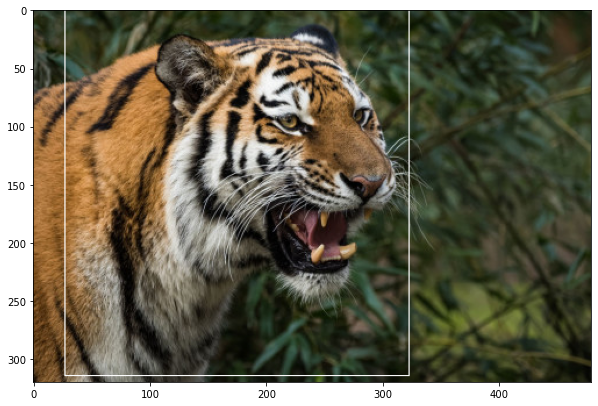

In [52]:
img_path = 'animal2.jpg'
img_size = (320, 320)
proba_threshold = 0.5
boxes, classes, scores, num_detections = get_pred_tflite(interpreter, img_path, img_size)
image = cv2.imread(img_path)
imwidth, imheight = image.shape[:2]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i, score in enumerate(scores[0]):
    if score > proba_threshold:
        labelindex = int(classes[0][i])
        if labelindex == 0:
            label = 'person'
        elif labelindex in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
            label = 'animal'
        else:
            label = 'unknown'
        xmin = int(boxes[0][i][0] * imheight)
        ymin = int(boxes[0][i][1] * imwidth)
        width = int(boxes[0][i][2] * imwidth)
        height = int(boxes[0][i][3] * imheight)
        print(xmin, ymin, width, height)
        cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
        cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [59]:
labels = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','street sign','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','hat','backpack','umbrella','shoe','eye glasses','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','plate','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','mirror','dining table','window','desk','toilet','door','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','blender','book','clock','vase','scissors','teddy bear','hair drier','toothbrush','hair brush']
labels[labelindex]

'cow'

In [54]:
np.set_printoptions(suppress=True)
boxes

array([[[ 0.0576838 , -0.01587489,  0.98138213,  0.67447376],
        [ 0.03923309,  0.00661215,  0.43615693,  0.6441679 ],
        [ 0.43589863,  0.0041362 ,  0.9770919 ,  0.56547135],
        [ 0.0342266 , -0.0194408 ,  0.2502701 ,  0.62642086],
        [ 0.17192739,  0.0010079 ,  0.98041266,  0.28668714],
        [ 0.4543091 ,  0.3030318 ,  0.9760833 ,  0.76216435],
        [ 0.04668273,  0.01328862,  0.45331728,  0.32814705],
        [ 0.252715  ,  0.23218375,  0.98154247,  0.97444993],
        [ 0.03384965,  0.4602915 ,  0.11307535,  0.5455241 ],
        [-0.01702824,  0.0048071 ,  0.33679318,  0.05682039],
        [ 0.00120433,  0.85315764,  0.22807784,  0.9968424 ],
        [ 0.01336631,  0.00325529,  0.31710076,  0.13209501],
        [-0.01038661, -0.02148217,  0.15689656,  0.56799215],
        [-0.00912035,  0.0085146 ,  0.6486502 ,  0.12249203],
        [ 0.03435987,  0.23557368,  0.63791007,  0.6398163 ],
        [ 0.22405852, -0.00082579,  0.70055145,  0.6484858 ],
        

looking at the results above, we can see that the bbox coordinates sometimes go below 0. (and also above 1, but the range should be till 2, as said in the tfhub page, so that's okay i suppose?) 